# Leigh Syndrome Project 
Nishaal Ramesh Ajmera   
Supervisors: Dr Stephen McGough, Dr Amy Vincent, Dr Conor Lawless, Atif Khan

# Load the data

In [1]:
# importing data
# some sheet names vary across the three datasets therefore sheet_names list is changed according to the dataset
import os
import pandas as pd
import numpy as np

path =r"/Users/nishaalajmera/Documents/MScProject/Data/"

sheet_names = ["All patient data - 2021-02-11T0","Genotype","Histochemistry","All Heteroplasmy",
               "Basic Clinical Data","Phenotype","Systemic features","Family History","Social History",
               "Blood Results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_ncl = [pd.read_excel(os.path.join(path,"Leighs_patients_at_Newcastle_and_outreach centres_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]


sheet_names = ["All patient data - 2021-02-11T1","Genotype","Histochemistry","All heteroplasmy",
               "Basic clinical data","Phenotype","Systemic features","Family History","Social History",
               "Blood results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_ucl = [pd.read_excel(os.path.join(path,"Leighs_patients_at_UCL_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]

sheet_names = ["All patient data - 2021-02-11T1","Genotype","Histochemistry","All Heteroplasmy",
               "Basic clinical data","Phenotype","Systemic features","Family History","Social history",
               "Blood Results","Neurophysiology","Imaging","Cardiac","Opthalmology","Audiology",
               "Transplant","NMDAS","Paediatric Information","NPMDS","Mortality"]

dataframes_oxf = [pd.read_excel(os.path.join(path,"Leighs_patients_at_Oxford_after_Albert_review.xlsx"),sheet_name=f) for f in sheet_names]

# the dataframes are seperated into individual dataframes for each sheet 
all_ncl,gen_ncl,his_ncl,heter_ncl,clin_ncl,phen_ncl,sys_ncl,fam_ncl,soc_ncl,blood_ncl,neuro_ncl,img_ncl,car_ncl,opth_ncl,aud_ncl,trans_ncl,nmdas_ncl,paed_ncl,npmds_ncl,mort_ncl = dataframes_ncl[:]

all_ucl,gen_ucl,his_ucl,heter_ucl,clin_ucl,phen_ucl,sys_ucl,fam_ucl,soc_ucl,blood_ucl,neuro_ucl,img_ucl,car_ucl,opth_ucl,aud_ucl,trans_ucl,nmdas_ucl,paed_ucl,npmds_ucl,mort_ucl = dataframes_ucl[:]

all_oxf,gen_oxf,his_oxf,heter_oxf,clin_oxf,phen_oxf,sys_oxf,fam_oxf,soc_oxf,blood_oxf,neuro_oxf,img_oxf,car_oxf,opth_oxf,aud_oxf,trans_oxf,nmdas_oxf,paed_oxf,npmds_oxf,mort_oxf = dataframes_oxf[:]


In [2]:
# Same sheet types are concatenated into one dataframe per sheet 
all =  pd.concat([all_ncl,all_ucl,all_oxf],ignore_index=True)
gen =  pd.concat([gen_ncl,gen_ucl,gen_oxf],ignore_index=True)
his =  pd.concat([his_ncl,his_ucl,his_oxf],ignore_index=True)
heter = pd.concat([heter_ncl,heter_ucl,heter_oxf],ignore_index=True)
clin = pd.concat([clin_ncl,clin_ucl,clin_oxf],ignore_index=True)
phen = pd.concat([phen_ncl,phen_ucl,phen_oxf],ignore_index=True)
sys = pd.concat([sys_ncl,sys_ucl,sys_oxf],ignore_index=True)
fam = pd.concat([fam_ncl,fam_ucl,fam_oxf],ignore_index=True)
soc = pd.concat([soc_ncl,soc_ucl,soc_oxf],ignore_index=True)
blood = pd.concat([blood_ncl,blood_ucl,blood_oxf],ignore_index=True)
neuro = pd.concat([neuro_ncl,neuro_ucl,neuro_oxf],ignore_index=True)
img = pd.concat([img_ncl,img_ucl,img_oxf],ignore_index=True)
car = pd.concat([car_ncl,car_ucl,car_oxf],ignore_index=True)
opth = pd.concat([opth_ncl,opth_ucl,opth_oxf],ignore_index=True)
aud = pd.concat([aud_ncl,aud_ucl,aud_oxf],ignore_index=True)
trans = pd.concat([trans_ncl,trans_ucl,trans_oxf],ignore_index=True)
nmdas = pd.concat([nmdas_ncl,nmdas_ucl,nmdas_oxf],ignore_index=True)
paed = pd.concat([paed_ncl,paed_ucl,paed_oxf],ignore_index=True)
npmds = pd.concat([npmds_ncl,npmds_ucl,npmds_oxf],ignore_index=True)
mort = pd.concat([mort_ncl,mort_ucl,mort_oxf],ignore_index=True)

# Data Cleaning 

In [3]:
# the date columns for sheets that are not converted to datetime format are converted 

df_date = [his,heter,clin,phen,sys,paed]

for df in df_date:
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


In [4]:
#pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
# opth.isnull().sum()/ opth.shape[0]


### Handling Missingness - First Cycle

Columns which have missingness of 60% and above in each dataframe are removed. Histochemistry, NPMDS and NMDAS dataframes are not capped at 60% threshold at this stage. 

In [5]:
# Removing columns with more than 60% missingness
# his,npmds,nmdas not included

df_NA = [gen,heter,clin,phen,sys,fam,soc,blood,neuro,img,car,opth,aud,paed,mort]

for df in df_NA:
    limitPer = len(df) * .40
    df.dropna(axis=1,thresh=limitPer,inplace=True)


In [6]:
# Other column that contains notes from Genetics data is removed
gen.drop(columns = ["Other notes"],inplace=True)

# Age from Heterogenous column is removed as it can be calculated from columns 
heter.drop(columns = ["Age"],inplace=True)

# Three columns in Histochemistry sheet that have more than 60% missingness are removed
his.drop(columns = ["Histochemistry","COX deficient fibers (%)","RRF (%)"],inplace=True)


# Uninformative column from Neurophysiology data is removed
neuro.drop(columns = ["EEG Report"],inplace=True)

# Date columns for time-independent features are removed
paed.drop(columns = ["Date"],inplace=True)

fam.drop(columns = ["Date"],inplace=True)

# dropping columns with all NA in mortality dataset
mort.dropna(axis=1, how='all',inplace=True)



### Renaming Features 
Renaming features for consistency and reproducibility 

In [7]:

all.columns = ['UniqueID', 'Birth_date', 'Sex', 'Institution', 'Death_date']

gen.columns = ['UniqueID', 'Genetics']

his.columns = ['UniqueID','Date','His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

heter.columns = ['UniqueID', 'Date', 'Heter_Blood']

clin.columns = ['UniqueID', 'Date', 'Weight_kg', 'FVC_predicted']

phen.columns = ['UniqueID', 'Date', 'Deafness', 'Hypotonia', 'Developmental_delay']

sys.columns = ['UniqueID','Date','Autoimmune','Endocrine','Gastrointestinal',
               'Liver','Reproductive','Respiratory','Hypertension',
               'Hypercholesterolaemia', 'Anaemia', 'Spinal_bone_disease']

fam.columns = ['UniqueID','Parental_consanguinity', 'Inheritance_Pattern']

soc.columns = ['UniqueID', 'Date', 'Smoking', 'Alcohol_consumption']

blood.columns = ['UniqueID', 'Date', 'Hemoglobin', 'Sodium',
                 'Potassium','Urea','Creatinine','Alanine_aminotransferase',
                 'Bilirubin','Alkaline_Phosphatase','Adjusted_calcium']

neuro.columns = ['UniqueID', 'Date', 'Slow_wave', 'Sharp_wave']

img.columns = ['UniqueID', 'Date', 'Other.1', 'Other.2']

car.columns = ['UniqueID', 'Date', 'ECG_Normal', 'ECHO_Normal']

opth.columns = ['UniqueID', 'Date', 'Opth_Normal']

aud.columns = ['UniqueID','Date','Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']
trans.columns = ['UniqueID','Date','Transplant','Kidney','Liver','Heart',
                 'Lung','Pancreas','Bone_Marrow']

paed.columns = ['UniqueID', 'Consanguinity','Presentation_age','Diagnosis_age',
                'Diagnosis_basis','Reduced_movement','Abnormalities','Gestational_age',
                'Delivery_method','Birth_weight_g','Resuscitation']

mort.columns = ['UniqueID','Age_at_death','Cause_of_Death_Ia']


### Data wrangling for some specific features 

In [8]:
# Remove rows that have NA for Date columns in each dataset
df_date = [his,heter,clin,phen,sys,blood,neuro,car,opth,aud]

for df in df_date:
    df.dropna( how='any',subset=['Date'],inplace=True)
    

In [9]:
# Replacing non-numerical value for numerical columns
blood['Bilirubin'] = blood['Bilirubin'].replace(['<3'],0)

aud['Aud_Normal'] = aud['Aud_Normal'].replace([True],1)
aud['Sensorineural_loss_right'] = aud['Sensorineural_loss_right'].replace(['NORMAL'],0)
aud['Sensorineural_loss_left'] = aud['Sensorineural_loss_left'].replace(['NORMAL'],0)
aud['Sensorineural_loss_right'] = aud['Sensorineural_loss_right'].replace([True],1)
aud['Sensorineural_loss_left'] = aud['Sensorineural_loss_left'].replace([True],1)

all.loc[all.UniqueID == 'ee9e', 'Sex'] = 'F' #replace the sex of patient ee9e


### Feature Imputation 1
By Deduction 

In [10]:
his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']] = his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']].fillna(0)
car[['ECG_Normal','ECHO_Normal']] = car[['ECG_Normal','ECHO_Normal']].fillna(0) 
opth[['Opth_Normal']] = opth[['Opth_Normal']].fillna(0) 
aud[['Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']] = aud[['Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']].fillna(0) 

## Joining data 

In [11]:
# Combining dataframes with temporal clinical outcomes
temporal = pd.merge(his, heter, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, clin, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, phen, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, sys, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, blood, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, neuro, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, car, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, opth, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, aud, on=["UniqueID", "Date"],how='outer')

# Combining dataframes for time-independent patient characteristics
char = pd.merge(all, gen, on=["UniqueID"],how='left')
char = pd.merge(char, paed, on=["UniqueID"],how='left')
char = pd.merge(char, fam, on=["UniqueID"],how='left')

# Merging both datasets together
df_combined =  pd.merge(char,temporal, on=["UniqueID"],how='left')

In [12]:
# Grouping feature types 
categorical = ['UniqueID','Sex','Institution','Genetics','Consanguinity',
               'Diagnosis_basis','Reduced_movement','Abnormalities',
               'Delivery_method','Resuscitation','Parental_consanguinity',
               'Inheritance_Pattern','His_Normal','ComplexI','ComplexII','ComplexIII',
               'ComplexIV','ComplexV','Deafness','Hypotonia','Developmental_delay',
               'Autoimmune','Endocrine','Gastrointestinal','Liver','Reproductive',
               'Respiratory','Hypertension','Hypercholesterolaemia','Anaemia',
               'Spinal_bone_disease','Slow_wave','Sharp_wave','ECG_Normal','ECHO_Normal',
               'Opth_Normal','Aud_Normal','Sensorineural_loss_right','Sensorineural_loss_left']

numerical = ['Presentation_age','Diagnosis_age','Gestational_age','Birth_weight_g',
             'Heter_Blood','Weight_kg','FVC_predicted','Hemoglobin','Sodium','Potassium','Urea',
             'Creatinine','Alanine_aminotransferase','Bilirubin','Alkaline_Phosphatase','Adjusted_calcium']

timeseries = ['Birth_date','Death_date','Date']

## Data Analysis

In [13]:
df_combined.shape

(354, 58)

### Descriptive Statistics 

In [14]:
df_combined[numerical].describe()

,Presentation_age,Diagnosis_age,Gestational_age,Heter_Blood,Weight_kg,FVC_predicted,Hemoglobin,Sodium,Potassium,Urea,Creatinine,Alanine_aminotransferase,Bilirubin,Alkaline_Phosphatase,Adjusted_calcium
count,147.000000,146.000000,216.000000,9.000000,122.000000,134.000000,34.000000,42.000000,41.000000,39.000000,37.000000,32.000000,35.000000,31.000000,25.00000
mean,1.527483,2.191781,39.319444,0.882222,20.978648,1.279080,84.688235,139.380952,4.431707,4.251282,25.810811,28.562500,5.228571,146.903226,2.43480
std,2.175722,1.599806,1.707655,0.099471,10.529962,1.234505,54.514817,2.836628,0.424523,1.957425,14.009596,51.515696,3.532086,45.142260,0.08766
min,0.000000,0.000000,32.000000,0.710000,6.795000,-1.417600,11.100000,128.000000,3.500000,0.800000,9.000000,10.000000,0.000000,89.000000,2.14000
25%,1.000000,2.000000,39.000000,0.800000,14.162500,0.379050,13.175000,139.000000,4.200000,2.400000,18.000000,14.000000,3.000000,119.000000,2.41000
50%,1.000000,2.000000,40.000000,0.950000,18.700000,1.084300,112.500000,140.000000,4.400000,4.400000,22.000000,17.000000,4.000000,135.000000,2.44000
75%,1.000000,2.000000,40.000000,0.960000,25.150000,2.259200,128.500000,141.000000,4.700000,5.650000,28.000000,20.250000,6.500000,159.500000,2.48000
max,10.000000,9.000000,42.000000,0.970000,71.000000,3.690000,155.000000,144.000000,5.400000,7.400000,68.000000,306.000000,19.000000,276.000000,2.56000


In [15]:
import warnings
warnings.filterwarnings('ignore')

df_combined[timeseries].describe()

,Birth_date,Death_date,Date
count,354,30,352
unique,57,9,305
top,2008-07-08 00:00:00,2013-08-25 00:00:00,2019-11-25 00:00:00
freq,87,10,4
first,1982-12-22 00:00:00,2012-01-23 00:00:00,1900-01-01 00:00:00
last,2018-04-10 00:00:00,2020-11-06 00:00:00,2021-02-08 00:00:00


In [16]:
print("Total number of patients in study:",df_combined['UniqueID'].nunique())
print("No. patient in Histochemistry sheet:",his['UniqueID'].nunique())
print("No. patient in Heteroplasmy sheet:",heter['UniqueID'].nunique())
print("No. patient in Clinical data sheet:",clin['UniqueID'].nunique())
print("No. patient in Phenotype sheet:",phen['UniqueID'].nunique())
print("No. patient in Systemic features sheet:",sys['UniqueID'].nunique())
print("No. patient in Family sheet:",fam['UniqueID'].nunique())
print("No. patient in Blood Results sheet:",blood['UniqueID'].nunique())
print("No. patient in Neurophysiology sheet:",neuro['UniqueID'].nunique())
print("No. patient in Imaging sheet:",img['UniqueID'].nunique())
print("No. patient in Cardiac sheet:",car['UniqueID'].nunique())
print("No. patient in Opthalmology sheet:",opth['UniqueID'].nunique())
print("No. patient in Audiology sheet:",aud['UniqueID'].nunique())
print("No. patient in Paediatric info sheet:",paed['UniqueID'].nunique())

Total number of patients in study: 57
No. patient in Histochemistry sheet: 19
No. patient in Heteroplasmy sheet: 11
No. patient in Clinical data sheet: 39
No. patient in Phenotype sheet: 54
No. patient in Systemic features sheet: 14
No. patient in Family sheet: 17
No. patient in Blood Results sheet: 15
No. patient in Neurophysiology sheet: 11
No. patient in Imaging sheet: 28
No. patient in Cardiac sheet: 26
No. patient in Opthalmology sheet: 16
No. patient in Audiology sheet: 13
No. patient in Paediatric info sheet: 31


### Feature Imputation 2
Single Imputation and Last Observation Carried Forward

In [17]:
# Imputation for Histochemistry features
df_combined.His_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).His_Normal.fillna(method="ffill")
df_combined.ComplexI=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexI.fillna(method="ffill")
df_combined.ComplexII=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexII.fillna(method="ffill")
df_combined.ComplexIII=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexIII.fillna(method="ffill")
df_combined.ComplexIV=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexIV.fillna(method="ffill")
df_combined.ComplexV=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ComplexV.fillna(method="ffill")

# Imputation for Heteroplasmy features
df_combined['Heter_Blood'] = df_combined['Heter_Blood'].fillna((df_combined['Heter_Blood'].mean()))

# Imputation for Clinical measurements 
df_combined.Weight_kg=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Weight_kg.apply(lambda x : x.ffill().bfill())
df_combined['FVC_predicted'] = df_combined['FVC_predicted'].fillna(clin.groupby('UniqueID')['FVC_predicted'].transform('median'))

# Imputation for Phenotype features
df_combined.Deafness=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Deafness.fillna(method="ffill")
df_combined.Hypotonia=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Hypotonia.fillna(method="ffill")
df_combined.Developmental_delay=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Developmental_delay.fillna(method="ffill")

# Imputation for Clinical measurements 
df_combined.Weight_kg=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Weight_kg.apply(lambda x : x.ffill().bfill())
df_combined['FVC_predicted'] = df_combined['FVC_predicted'].fillna(clin.groupby('UniqueID')['FVC_predicted'].transform('median'))

# Imputation for Blood features
df_combined['Hemoglobin']= df_combined['Hemoglobin'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Hemoglobin'].transform('mean'))
df_combined['Sodium']= df_combined['Sodium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Sodium'].transform('mean'))
df_combined['Potassium']= df_combined['Potassium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Potassium'].transform('mean'))
df_combined['Urea']= df_combined['Urea'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Urea'].transform('mean'))
df_combined['Creatinine']= df_combined['Creatinine'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Creatinine'].transform('mean'))
df_combined['Alanine_aminotransferase']= df_combined['Alanine_aminotransferase'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Alanine_aminotransferase'].transform('mean'))
df_combined['Bilirubin']= df_combined['Bilirubin'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Bilirubin'].transform('mean'))
df_combined['Alkaline_Phosphatase']= df_combined['Alkaline_Phosphatase'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Alkaline_Phosphatase'].transform('mean'))
df_combined['Adjusted_calcium']= df_combined['Adjusted_calcium'].fillna(df_combined.groupby([df_combined.Date.dt.year,'UniqueID'])['Adjusted_calcium'].transform('mean'))

# Imputation for Neurophysiological features
df_combined.Slow_wave=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Slow_wave.fillna(method="ffill")
df_combined.Sharp_wave=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sharp_wave.fillna(method="ffill")

# Imputation for Cardiac features
df_combined.ECG_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ECG_Normal.fillna(method="ffill")
df_combined.ECHO_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).ECHO_Normal.fillna(method="ffill")

# Imputation for Opthalmology features
df_combined.Opth_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Opth_Normal.fillna(method="ffill")

# Imputation for Audiology features
df_combined.Aud_Normal=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Aud_Normal.fillna(method="ffill")
df_combined.Sensorineural_loss_right=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sensorineural_loss_right.fillna(method="ffill")
df_combined.Sensorineural_loss_left=df_combined.sort_values(by=['UniqueID','Date']).groupby(['UniqueID']).Sensorineural_loss_left.fillna(method="ffill")

After, imputation of missing values within Unique ID groups, there are still many features that have high missingness. Therefore, features with less than 60% missingness are selected for the combined dataset and further imputation will be carried out. 

In [18]:
cols = ['UniqueID','Birth_date','Death_date','Date',
        'Institution','Sex',
        'Diagnosis_age','Presentation_age','Gestational_age',
        'Heter_Blood','Birth_weight_g','Weight_kg','FVC_predicted',
        'Genetics','Consanguinity','Diagnosis_basis','Delivery_method',
        'Deafness','Hypotonia','Developmental_delay','Resuscitation',
        'Sharp_wave','ECG_Normal','ECHO_Normal',
        'His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

df_condensed = df_combined[cols]




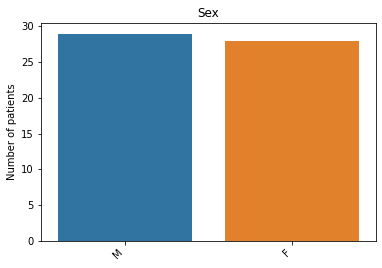

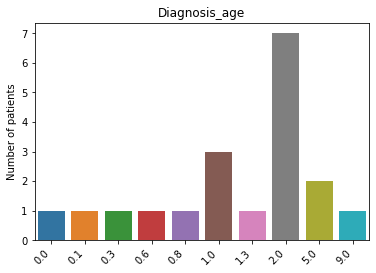

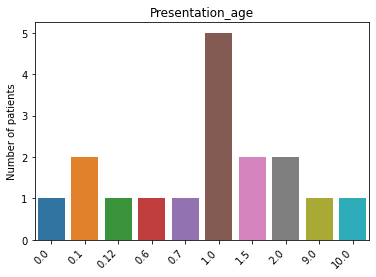

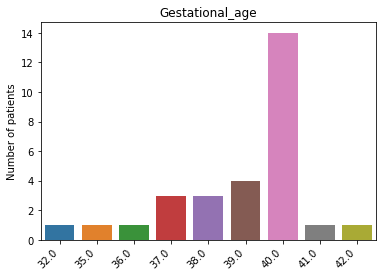

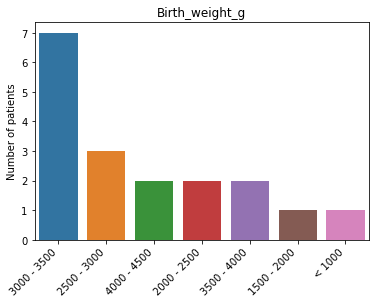

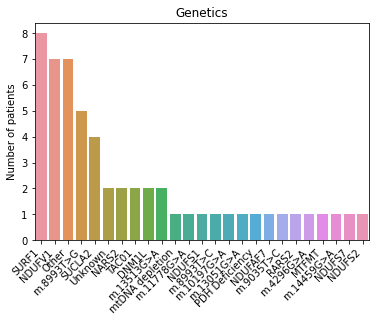

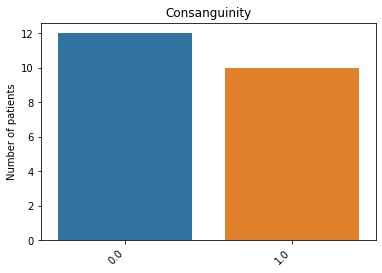

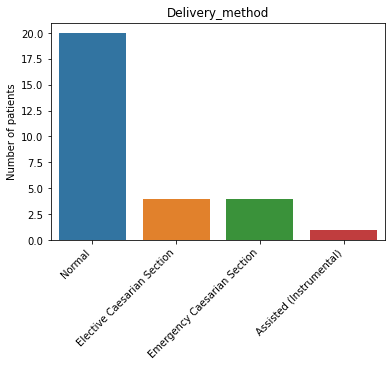

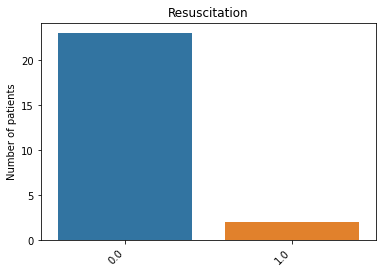

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

freq = df_condensed[['UniqueID','Sex','Diagnosis_age','Presentation_age',
                     'Gestational_age','Birth_weight_g','Genetics',
                     'Consanguinity','Delivery_method','Resuscitation']].drop_duplicates()

freq.drop(columns=['UniqueID'],inplace=True)

#for i in freq.columns:
#    fig_dims = (8, 6)
#    ax = plt.subplots(figsize=fig_dims)
#    sns.barplot(freq[i].value_counts().index, freq[i].value_counts()).set_title(i)
#    plt.show()


for i in freq.columns:
    plt.figure(figsize=(6,4))
    chart = sns.barplot(freq[i].value_counts().index, freq[i].value_counts()).set_title(i)
    plt.ylabel("Number of patients")
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',  
    )
    None #dont show any label objects

In [20]:
#pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
#df_combined.isnull().sum().sort_values(ascending = False)/ df_combined.shape[0]

### Informative imputation 

In [21]:
cols = ['Diagnosis_age','Presentation_age','Gestational_age',
        'Heter_Blood','Birth_weight_g','Weight_kg','FVC_predicted',
        'Genetics','Consanguinity','Diagnosis_basis','Delivery_method',
        'Deafness','Hypotonia','Developmental_delay','Resuscitation',
        'Sharp_wave','ECG_Normal','ECHO_Normal',
        'His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']

for i in cols:
    df_condensed[i]=df_condensed[i].fillna(9)


In [22]:
df_condensed.shape

(354, 30)

## Data Preparation 

In [23]:
# Preparing data for survival analysis 
surv_df = df_condensed

# Removing records with dates prior to birth date
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]] 

# Keeping last date seen 
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

# Calculating patient age at date of visit/record
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)
#Converting Age to Years
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)

# Recording Event - Death or Right Censored
surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)
# Dropping unecessary columns 
surv_df.drop(columns=['Birth_date','Death_date','Date','Institution','Diagnosis_basis','UniqueID'],inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

surv_df['Birth_weight_g']=surv_df['Birth_weight_g'].replace({'< 1000':0,'1500 - 2000':1,
                                                             '2000 - 2500':2,'2500 - 3000':3,'3000 - 3500':4,
                                                             '3500 - 4000':5,'4000 - 4500':6})
surv_df['Genetics']=surv_df['Genetics'].replace({'Unknown':9,'Other':9})

surv_df = pd.get_dummies(surv_df,columns=['Genetics'],drop_first=True,prefix='G')
surv_df = pd.get_dummies(surv_df,columns=['Delivery_method'],drop_first=True,prefix='Del')

In [25]:
pd.set_option('display.max_columns', 250)
surv_df.head(5)

,Sex,Diagnosis_age,Presentation_age,Gestational_age,Heter_Blood,Birth_weight_g,Weight_kg,FVC_predicted,Consanguinity,Deafness,Hypotonia,Developmental_delay,Resuscitation,Sharp_wave,ECG_Normal,ECHO_Normal,His_Normal,ComplexI,ComplexII,ComplexIII,ComplexIV,ComplexV,Age,Event,G_DNM1L,G_MTFMT,G_NARS2,G_NDUFAF7,G_NDUFS1,G_NDUFS2,G_NDUFS7,G_NDUFV1,G_PDH Deficiency,G_RARS2,G_SUCLA2,G_SURF1,G_TAC01,G_m.10197G>A,G_m.11778G>A,G_m.13051G>A,G_m.13513G>A,G_m.14459G>A,G_m.4296G>A,G_m.8993T>C,G_m.8993T>G,G_m.9035T>C,G_mtDNA depletion,Del_Assisted (Instrumental),Del_Elective Caesarian Section,Del_Emergency Caesarian Section,Del_Normal
0,0,9.0,9.0,9.0,0.882222,9,23.0,9.0000,9.0,0.0,9.0,9.0,9.0,0.0,0.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,1279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
107,0,9.0,9.0,9.0,0.882222,9,9.0,3.6254,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,6311,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319,1,9.0,9.0,9.0,0.882222,9,9.0,9.0000,9.0,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1029,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
318,0,9.0,9.0,9.0,0.882222,9,17.3,9.0000,9.0,9.0,1.0,1.0,9.0,9.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,1,9.0,9.0,9.0,0.882222,9,9.0,9.0000,9.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,883,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting Data 
Split data at 80% into train and test dataset 

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(surv_df,test_size=0.2, random_state=0)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

## Survival Analysis 1 : Kaplan Meier Estimator 

In [27]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(y_train['Age'], event_observed=y_train['Event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 44 total observations, 36 right-censored observations>

<AxesSubplot:title={'center':'Survival plot of Leigh patients'}, xlabel='Age (days)', ylabel='Probability of survival'>

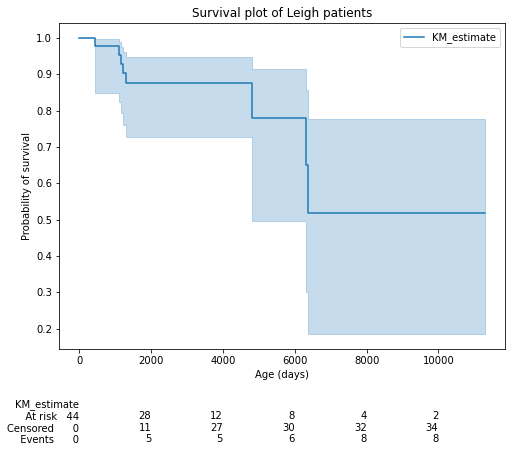

In [28]:
from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts

plt.figure(figsize=(8,6))
kmf.plot_survival_function()
plt.title("Survival plot of Leigh patients");
plt.ylabel("Probability of survival")
plt.xlabel("Age (days)")

add_at_risk_counts(kmf)

## Survival Analysis 2 : Cox PH 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold


In [30]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)

In [31]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)


CoxPHSurvivalAnalysis(alpha=0.1)

In [33]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
G_SURF1,2.992240e+00
Sharp_wave,2.134048e+00
Del_Elective Caesarian Section,1.903019e+00
ComplexIV,1.764941e+00
Developmental_delay,1.604620e+00
G_DNM1L,1.563219e+00
Deafness,9.848384e-01
Resuscitation,6.895875e-01
G_m.8993T>G,5.130742e-01
Hypotonia,4.582705e-01


In [34]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0] )


concordance index: 0.3333333333333333


In [35]:

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline



In [36]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [37]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis()),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

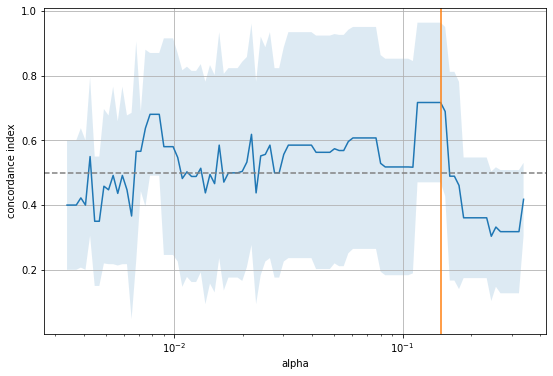

In [38]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 8


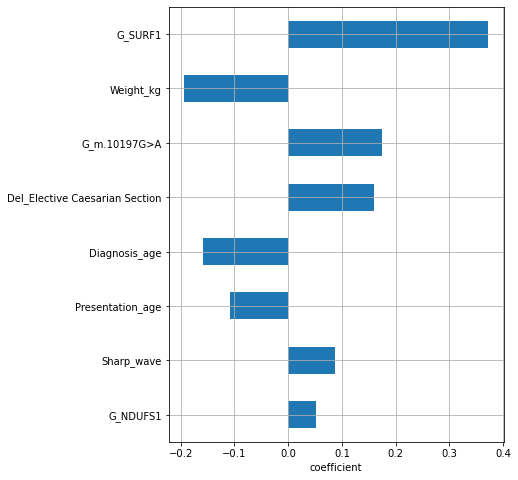

In [39]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [40]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
G_SURF1,0.372345
G_m.10197G>A,0.174818
Del_Elective Caesarian Section,0.160208
Sharp_wave,0.086273
G_NDUFS1,0.052727
Presentation_age,-0.107946
Diagnosis_age,-0.159086
Weight_kg,-0.193894


In [41]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0])

concordance index: 0.8888888888888888


## Handling Missingness - Cycle 2
Columns which have missingness of 40% and above in each dataframe are removed.

In [42]:
# Same sheet types are concatenated into one dataframe per sheet 
all =  pd.concat([all_ncl,all_ucl,all_oxf],ignore_index=True)
gen =  pd.concat([gen_ncl,gen_ucl,gen_oxf],ignore_index=True)
his =  pd.concat([his_ncl,his_ucl,his_oxf],ignore_index=True)
heter = pd.concat([heter_ncl,heter_ucl,heter_oxf],ignore_index=True)
clin = pd.concat([clin_ncl,clin_ucl,clin_oxf],ignore_index=True)
phen = pd.concat([phen_ncl,phen_ucl,phen_oxf],ignore_index=True)
sys = pd.concat([sys_ncl,sys_ucl,sys_oxf],ignore_index=True)
fam = pd.concat([fam_ncl,fam_ucl,fam_oxf],ignore_index=True)
soc = pd.concat([soc_ncl,soc_ucl,soc_oxf],ignore_index=True)
blood = pd.concat([blood_ncl,blood_ucl,blood_oxf],ignore_index=True)
neuro = pd.concat([neuro_ncl,neuro_ucl,neuro_oxf],ignore_index=True)
img = pd.concat([img_ncl,img_ucl,img_oxf],ignore_index=True)
car = pd.concat([car_ncl,car_ucl,car_oxf],ignore_index=True)
opth = pd.concat([opth_ncl,opth_ucl,opth_oxf],ignore_index=True)
aud = pd.concat([aud_ncl,aud_ucl,aud_oxf],ignore_index=True)
trans = pd.concat([trans_ncl,trans_ucl,trans_oxf],ignore_index=True)
nmdas = pd.concat([nmdas_ncl,nmdas_ucl,nmdas_oxf],ignore_index=True)
paed = pd.concat([paed_ncl,paed_ucl,paed_oxf],ignore_index=True)
npmds = pd.concat([npmds_ncl,npmds_ucl,npmds_oxf],ignore_index=True)
mort = pd.concat([mort_ncl,mort_ucl,mort_oxf],ignore_index=True)

In [43]:
# the date columns for sheets that are not converted to datetime format are converted 

df_date = [his,heter,clin,phen,sys,paed]

for df in df_date:
    df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [44]:
# Remove rows that have NA for Date columns in each dataset
df_date = [his,heter,clin,phen,sys,blood,neuro,car,opth,aud]

for df in df_date:
    df.dropna( how='any',subset=['Date'],inplace=True)

In [45]:
# Other column that contains notes from Genetics data is removed
gen.drop(columns = ["Other notes"],inplace=True)

# Age from Heterogenous column is removed as it can be calculated from columns 
heter.drop(columns = ["Age"],inplace=True)

# Three columns in Histochemistry sheet that have more than 60% missingness are removed
his.drop(columns = ["Histochemistry","COX deficient fibers (%)","RRF (%)"],inplace=True)

# Drop redundant Sex column in clin dataframe
clin.drop(columns = ["Sex"],inplace=True)


# Uninformative column from Neurophysiology data is removed
neuro.drop(columns = ["EEG Report"],inplace=True)

# Date columns for time-independent features are removed
paed.drop(columns = ["Date"],inplace=True)

fam.drop(columns = ["Date"],inplace=True)

# dropping columns with all NA in mortality dataset
mort.dropna(axis=1, how='all',inplace=True)


In [46]:
# use replace
all.rename(columns = {'Unique ID':'UniqueID','Birth date':'Birth_date', 'Death date':'Death_date'},inplace=True)

gen.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

his.rename(columns = {'Unique ID':'UniqueID','Normal':'His_Normal','Complex I':'ComplexI','Complex II':'ComplexII','Complex III':'ComplexIII','Complex IV':'ComplexIV','Complex V':'ComplexV'},inplace=True)

heter.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

clin.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

phen.rename(columns = {'Unique ID':'UniqueID'},inplace=True)

sys.rename(columns = {'Unique ID':'UniqueID'} ,inplace=True)

blood.rename(columns = {'Unique ID':'UniqueID','Hemoglobin (Hb) (g/L)':'Hemoglobin', 'Sodium (Na)':'Sodium',
                 'Potassium (K)':'Potassium','Alanine aminotransferase (ALT)':'Alanine_aminotransferase'}, inplace=True)

neuro.rename(columns = {'Unique ID':'UniqueID'} ,inplace=True)

car.rename(columns = {'Unique ID':'UniqueID','Normal':'ECG_Normal', 'Normal.1':'ECHO_Normal'}, inplace=True)

opth.rename(columns = {'Unique ID':'UniqueID','Normal':'Opth_Normal'}, inplace=True)

aud.rename(columns = {'Unique ID':'UniqueID'}, inplace=True)

paed.rename(columns = {'Unique ID':'UniqueID', 'Diagnosis age':'Diagnosis_age',
                'Diagnosis_basis':'Diagnosis_basis','Gestational age':'Gestational_age',
                'Delivery method':'Delivery_method'}, inplace=True)

mort.rename(columns = {'Unique ID':'UniqueID','Age at death':'Age_at_death','Cause of Death Ia)':'Cause_of_Death_Ia'},inplace=True)

fam.rename(columns = {'Unique ID':'UniqueID'}, inplace=True)

# Replacing non-numerical value for numerical columns
blood['Bilirubin'] = blood['Bilirubin'].replace(['<3'],0)


all.loc[all.UniqueID == 'ee9e', 'Sex'] = 'F' #replace the sex of patient ee9e

In [47]:
his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']] = his[['His_Normal','ComplexI','ComplexII','ComplexIII','ComplexIV','ComplexV']].fillna(0)
car[['ECG_Normal','ECHO_Normal']] = car[['ECG_Normal','ECHO_Normal']].fillna(0) 
opth[['Opth_Normal']] = opth[['Opth_Normal']].fillna(0) 


In [48]:
# Combining dataframes with temporal clinical outcomes
temporal = pd.merge(his, heter, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, clin, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, phen, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, sys, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, blood, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, neuro, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, car, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, opth, on=["UniqueID", "Date"],how='outer')
temporal = pd.merge(temporal, aud, on=["UniqueID", "Date"],how='outer')

# Combining dataframes for time-independent patient characteristics
char = pd.merge(all, gen, on=["UniqueID"],how='left')
char = pd.merge(char, paed, on=["UniqueID"],how='left')
char = pd.merge(char, fam, on=["UniqueID"],how='left')

# Merging both datasets together
df_combined =  pd.merge(char,temporal, on=["UniqueID"],how='left')

In [49]:
df_combined.shape

(354, 322)

In [50]:
limitPer = len(df_combined) * .60
df_combined.dropna(axis=1,thresh=limitPer,inplace=True)
df_combined.drop(columns=['Gestational_age','Delivery_method'],inplace=True)

In [51]:
df_condensed = df_combined
# Informative imputation
df_condensed['Genetics']=df_condensed['Genetics'].fillna(9)
df_condensed = pd.merge(df_condensed, all[['UniqueID','Death_date']], on=["UniqueID"],how='left')

## Data Preparation - Cycle 2

In [52]:
# Preparing data for survival analysis 
surv_df = df_condensed

# Removing records with dates prior to birth date
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]] 

# Keeping last date seen 
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

# Calculating patient age at date of visit/record
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)
#Converting Age to Years
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)

# Recording Event - Death or Right Censored
surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)
# Dropping unecessary columns 
surv_df.drop(columns=['Birth_date','Death_date','Date','UniqueID','Institution'],inplace=True)

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

surv_df['Genetics']=surv_df['Genetics'].replace({'Unknown':9,'Other':9})

surv_df = pd.get_dummies(surv_df,columns=['Genetics'],drop_first=True,prefix='G')

In [53]:
pd.set_option('display.max_columns', 250)
surv_df.head(5)

,Sex,Age,Event,G_DNM1L,G_MTFMT,G_NARS2,G_NDUFAF7,G_NDUFS1,G_NDUFS2,G_NDUFS7,G_NDUFV1,G_PDH Deficiency,G_RARS2,G_SUCLA2,G_SURF1,G_TAC01,G_m.10197G>A,G_m.11778G>A,G_m.13051G>A,G_m.13513G>A,G_m.14459G>A,G_m.4296G>A,G_m.8993T>C,G_m.8993T>G,G_m.9035T>C,G_mtDNA depletion
0,0,1279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
107,0,6311,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319,1,1029,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
318,0,2830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,1,883,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state = 0

df_train, df_test = train_test_split(surv_df,test_size=0.2, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

### Survival Model 1 - Kaplan Meier Fitter 

In [55]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(y_train['Age'], event_observed=y_train['Event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 44 total observations, 36 right-censored observations>

<AxesSubplot:title={'center':'Survival plot of Leigh patients (NPMDS data)'}, xlabel='Age (days)', ylabel='Probability of survival'>

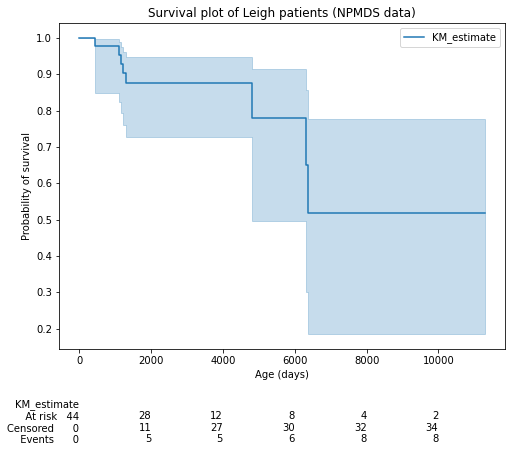

In [56]:
from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts

plt.figure(figsize=(8,6))
kmf.plot_survival_function()
plt.title("Survival plot of Leigh patients (NPMDS data)");
plt.ylabel("Probability of survival")
plt.xlabel("Age (days)")

add_at_risk_counts(kmf)

### Survival Model 2 - Cox Proportional Hazard

In [57]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


In [ ]:
cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

In [59]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
G_m.10197G>A,2.143449
G_SURF1,2.124209
G_NDUFS1,2.086378
Sex,1.248364
G_m.8993T>G,0.820356
G_DNM1L,0.402867
G_m.8993T>C,0.000000
G_m.11778G>A,0.000000
G_m.13051G>A,-0.158568
G_NDUFAF7,-0.277795


In [60]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

concordance index: 0.9444444444444444


In [61]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [62]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis()),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)


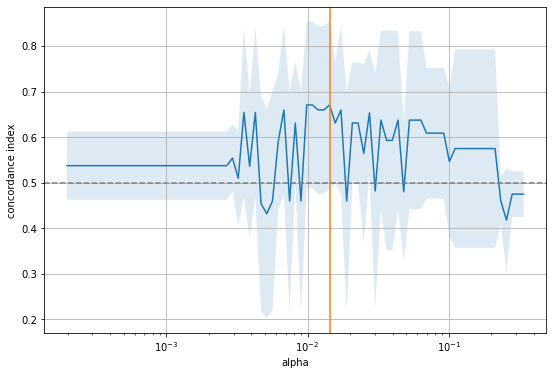

In [63]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 6


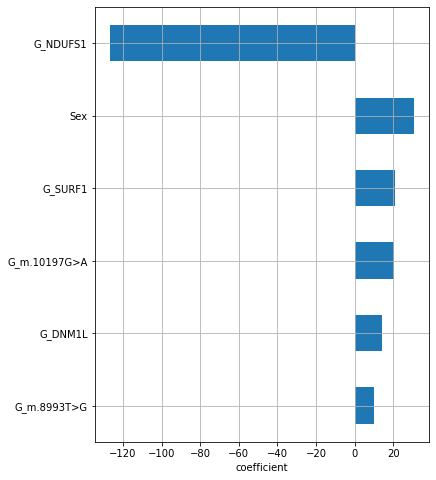

In [64]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [65]:

non_zero_coefs.sort_values(by='coefficient',ascending=False)



,coefficient
Sex,30.779195
G_SURF1,21.085969
G_m.10197G>A,20.301600
G_DNM1L,14.240766
G_m.8993T>G,10.042984
G_NDUFS1,-126.809599


In [66]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.9444444444444444


### Random Survival Forest 

In [67]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=7,
                           min_samples_leaf=10,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=10,
                     min_samples_split=7, n_estimators=50, n_jobs=-1,
                     random_state=0, verbose=1)

In [68]:
rsf.score(X_test, y_test)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


0.7222222222222222

## Data Cleaning for NPMDS data 

In [69]:
# pd.set_option('display.max_rows', 250)
# To check percentage of missing values in each column 
# npmds.isnull().sum().sort_values(ascending = False)/ npmds.shape[0]


In [70]:
# Functions to combine same columns in NPMDS across different age ranges
def npmds_combine (col1,col2,col3):
    npmds[col1].update(npmds.pop(col2))
    npmds[col1].update(npmds.pop(col3))

def npmds_combine2 (col1,col2):
    npmds[col1].update(npmds.pop(col2))


In [71]:
npmds_combine('1. Vision','1. Vision.1','1. Vision.2')
npmds_combine('2. Hearing','2. Hearing.1','2. Hearing.2')
npmds_combine('3. Communication','3. Communication.1','3. Communication.2')
npmds_combine('4. Feeding','4. Feeding.1','4. Feeding.2')
npmds_combine('5. Mobility','6. Mobility.1','6. Mobility')
npmds_combine('1. Seizures','1. Seizures.1','1. Seizures.2')
npmds_combine('2. Encephalopathy','2. Encephalopathy.1','2. Encephalopathy.2')
npmds_combine('3. Gastrointestinal','4. Gastrointestinal','4. Gastrointestinal.1')
npmds_combine('4. Endocrine','5. Endocrine','5. Endocrine.1')
npmds_combine('5. Respiratory','6. Respiratory','6. Respiratory.1')
npmds_combine('6. Cardiovascular','7. Cardiovascular','7. Cardiovascular.1')
npmds_combine('7. Renal','8. Renal','8. Renal.1')
npmds_combine('8. Liver','9. Liver','9. Liver.1')
npmds_combine('9. Blood','10. Blood','10. Blood.1')

npmds_combine('1. Growth','1. Growth.1','1. Growth.2')
npmds_combine('2. Development','2. Development.1','2. Development.2')
npmds_combine('3. Vision','3. Vision.1','3. Vision.2')
npmds_combine('4. Ptosis','4. Ptosis.1','4. Ptosis.2')
npmds_combine('5. Myopathy','5. Myopathy.1','5. Myopathy.2')
npmds_combine('6. Pyramidal','7. Pyramidal','7. Pyramidal.1')
npmds_combine('7. Extrapyramidal','8. Extrapyramidal','8. Extrapyramidal.1')
npmds_combine('8. Neuropathy','9. Neuropathy','9. Neuropathy.1')

npmds_combine("Child's overall health","Child's overall health.1","Child's overall health.2")
npmds_combine("Child's limitations in physical activities","Child's limitations in physical activities.1","Child's limitations in physical activities.2")
npmds_combine("Child's energy levels","Child's energy levels.1","Child's energy levels.2")
npmds_combine("Child's bodily pain","Child's bodily pain.1","Child's bodily pain.2")
npmds_combine("Child's behaviour","Child's behaviour.1","Child's behaviour.2")
npmds_combine("Child's interaction with others","Child's interaction with others.1","Child's interaction with others.2")
npmds_combine("Parent's emotional difficulty because of child","Parent's emotional difficulty because of child.1","Parent's emotional difficulty because of child.2")
npmds_combine('Time limited because of child','Time limited because of child.1','Time limited because of child.2')
npmds_combine('Family activity limited because of child','Family activity limited because of child.1','Family activity limited because of child.2')
npmds_combine('Financial cost','Financial cost.1','Financial cost.2')
npmds_combine('Ability of family to get along','Ability of family to get along.1','Ability of family to get along.3')
npmds_combine('Positive effects of illness','Positive effects of illness.1','Positive effects of illness.3')

In [72]:
# 2 columns 


npmds_combine2('5. Self-care','5. Self-care.1')
npmds_combine2('7. Educational achievement','7. Educational achievement.1')
npmds_combine2('System specific involvement.1','System specific involvement.2')
npmds_combine2('3. Stroke-like episodes','3. Stroke-like episodes.1')
npmds_combine2('6. Ataxia','6. Ataxia.1')



npmds_combine2("Child's limitations in everyday life","Child's limitations in everyday life.1")
npmds_combine2('Child bothered by emotional problems during past 4 weeks','Child bothered by emotional problems during past 4 weeks.1')
npmds_combine2("Child's satisfaction with themselves","Child's satisfaction with themselves.1")



npmds_combine2('Overall health','Overall health.1')
npmds_combine2('Limitations in physical activities','Limitations in physical activities.1')
npmds_combine2('Limitations in everyday life','Limitations in everyday life.1')
npmds_combine2('Energy levels','Energy levels.1')
npmds_combine2('Bodily pain','Bodily pain.1')
npmds_combine2('Emotional difficulty','Emotional difficulty.1')
npmds_combine2('Satisfaction with self','Satisfaction with self.1')
npmds_combine2('Behaviour','Behaviour.1')
npmds_combine2('Interaction with others','Interaction with others.1')
npmds_combine2('Ability of family to get along.2','Ability of family to get along.4')
npmds_combine2('Positive effects of illness.2','Positive effects of illness.4')


In [73]:
npmds = npmds.add_suffix('_npmds')
npmds.rename(columns={ 'Unique ID_npmds':'Unique ID','Date_npmds':'Date',
                    '1. Vision_npmds':'Vision_npmds_self',
                    '2. Hearing_npmds':'Hearing_npmds',
                    '3. Communication_npmds':'Communication_npmds',
                    '4. Feeding_npmds':'Feeding_npmds',
                    '5. Mobility_npmds':'Mobility_npmds',
                    '1. Seizures_npmds':'Seizures_npmds',
                    '2. Encephalopathy_npmds':'Encephalopathy_npmds',
                    '3. Gastrointestinal_npmds':'Gastrointestinal_npmds',
                    '4. Endocrine_npmds':'Endocrine_npmds',
                    '5. Respiratory_npmds':'Respiratory_npmds',
                    '6. Cardiovascular_npmds':'Cardiovascular_npmds',
                    '7. Renal_npmds':'Renal_npmds',
                    '8. Liver_npmds':'Liver_npmds',
                    '9. Blood_npmds':'Blood_npmds',
                    '1. Growth_npmds':'Growth_npmds',
                    '2. Development_npmds':'Development_npmds',
                    '3. Vision_npmds':'Vision_npmds',
                    '4. Ptosis_npmds':'Ptosis_npmds',
                    '5. Myopathy_npmds':'Myopathy_npmds',
                    '6. Pyramidal_npmds':'Pyramidal_npmds',
                    '7. Extrapyramidal_npmds':'Extrapyramidal_npmds',
                    '8. Neuropathy_npmds':'Neuropathy_npmds',
                    "Child's overall health_npmds":"Child's overall health_par",
                    "Child's limitations in physical activities_npmds":"Child's limitations in physical activities_par",
                    "Child's energy levels_npmds":"Child's energy levels_par",
                    "Child's bodily pain_npmds":"Child's bodily pain_par",
                    "Child's behaviour_npmds":"Child's behaviour_par",
                    "Child's interaction with others_npmds":"Child's interaction with others_par",
                    "Parent's emotional difficulty because of child_npmds":"Parent's emotional difficulty because of child_par",
                    'Time limited because of child_npmds':'Time limited because of child_par',
                    'Family activity limited because of child_npmds':'Family activity limited because of child_par',
                    'Financial cost_npmds':'Financial cost_par',
                    'Ability of family to get along_npmds':'Ability of family to get along_par',
                    'Positive effects of illness_npmds':'Positive effects of illness_par',   
                    '5. Self-care_npmds':'Self-care_npmds',
                    '7. Educational achievement_npmds':'Educational achievement_npmds',
                    '3. Stroke-like episodes_npmds':'Stroke-like episodes_npmds',
                    '6. Ataxia_npmds':'Ataxia_npmds', 
                    'Ability of family to get along.2_npmds':'Ability of family to get along_self',
                    'Positive effects of illness.2_npmds':'Positive effects of illness_self' },inplace=True)
 
    
    

In [74]:
# dropping columns with all NA in NPMDS data
npmds.dropna(axis=1, how='all',inplace=True)


In [75]:
# dropping columns with more than 50% NA values
npmds.drop(columns = ['Positive effects of illness_self','NPMDS (2-11) questions_npmds',          
'Ability of family to get along_self','Interaction with others_npmds','Behaviour_npmds',             
'Satisfaction with self_npmds','NPMDS (2-11 years)_npmds','Emotional difficulty_npmds',                      
'Bodily pain_npmds','Energy levels_npmds','Limitations in everyday life_npmds',             
'Limitations in physical activities_npmds','Overall health_npmds'],inplace=True)  




In [76]:
npmds.shape


(27, 43)

In [77]:
print("Total number of patients in NPMDS data:",npmds['Unique ID'].nunique())


Total number of patients in NPMDS data: 20


In [78]:
npmds.drop(columns= ["Child's overall health_par",
                        "Child's limitations in physical activities_par",              
                        "Child's energy levels_par",                 
                        "Child's bodily pain_par",                                          
                        "Child's behaviour_par",                                          
                        "Child's interaction with others_par",                            
                        "Parent's emotional difficulty because of child_par",
                        "Time limited because of child_par",                         
                        "Family activity limited because of child_par",                    
                        "Financial cost_par",                                               
                        "Ability of family to get along_par",                               
                        "Positive effects of illness_par",                                   
                        "Self-care_npmds",                                                 
                        "Educational achievement_npmds",                                     
                        "Stroke-like episodes_npmds",                                      
                        "Ataxia_npmds",                                                     
                        "Child's limitations in everyday life_npmds",                    
                        "Child bothered by emotional problems during past 4 weeks_npmds",   
                        "Child's satisfaction with themselves_npmds"],inplace=True)



In [79]:
npmds_1=npmds.fillna(9)


In [80]:
npmds_1.rename(columns = {'Unique ID': 'UniqueID'},inplace=True)


In [81]:
# Merging both datasets together
npmds_combined =  pd.merge(npmds_1,all, on=["UniqueID"],how='left')



### Data Preparation for NPMDS

In [82]:
surv_df = npmds_combined
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]]
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")
surv_df['Age'] = surv_df.apply(lambda x: x['Death_date']-x['Birth_date'] \
                               if(pd.notnull(x['Death_date'])) \
                               else x['Date']- x['Birth_date'], axis = 1)

surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)

surv_df['Event'] =  surv_df.apply(lambda x: 0 \
                               if(pd.isnull(x['Death_date'])) \
                               else 1, axis = 1)

surv_df.drop(columns=['UniqueID','Birth_date','Death_date','Date','Institution'],inplace=True)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])


In [83]:
surv_df.head(4)

,Vision_npmds_self,Hearing_npmds,Communication_npmds,Feeding_npmds,Mobility_npmds,Seizures_npmds,Encephalopathy_npmds,Gastrointestinal_npmds,Endocrine_npmds,Respiratory_npmds,Cardiovascular_npmds,Renal_npmds,Liver_npmds,Blood_npmds,Growth_npmds,Development_npmds,Vision_npmds,Ptosis_npmds,Myopathy_npmds,Pyramidal_npmds,Extrapyramidal_npmds,Neuropathy_npmds,Sex,Age,Event
4,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,1.0,1.0,0.0,2.0,0.0,1,446,0
10,1.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,9.0,0.0,3.0,3.0,0.0,1.0,0,1308,0
11,2.0,1.0,3.0,3.0,3.0,3.0,9.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,3.0,2.0,0.0,1,430,1
12,9.0,9.0,9.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0,1334,0


In [84]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(surv_df["Age"], event_observed=surv_df["Event"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 20 total observations, 16 right-censored observations>

<AxesSubplot:title={'center':'Survival plot of Leigh patients (NPMDS data)'}, xlabel='Age (days)', ylabel='Probability of survival'>

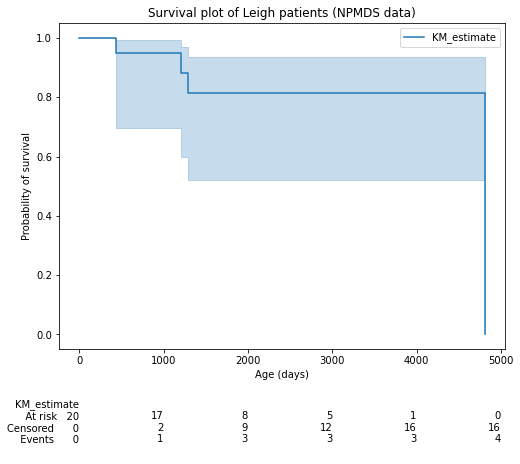

In [85]:
from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts

plt.figure(figsize=(8,6))

kmf.plot_survival_function()
plt.title("Survival plot of Leigh patients (NPMDS data)");
plt.ylabel("Probability of survival")
plt.xlabel("Age (days)")

add_at_risk_counts(kmf)

Text(0.5, 0, 'Age (days)')

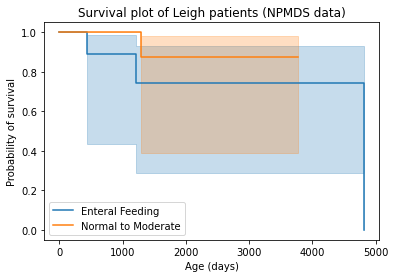

In [86]:
ax = plt.subplot(111)

feed = (surv_df["Feeding_npmds"] == 3)

T = surv_df["Age"]
E = surv_df["Event"]

kmf.fit(T[feed], event_observed=E[feed], label="Enteral Feeding")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~feed], event_observed=E[~feed], label="Normal to Moderate")
kmf.plot_survival_function(ax=ax)

plt.title("Survival plot of Leigh patients (NPMDS data)");
plt.ylabel("Probability of survival")
plt.xlabel("Age (days)")


In [87]:
from lifelines.statistics import logrank_test

results = logrank_test(T[feed], T[~feed], E[feed], E[~feed], alpha=.99)

results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.74 0.39      1.37

Text(0.5, 0, 'Age(days)')

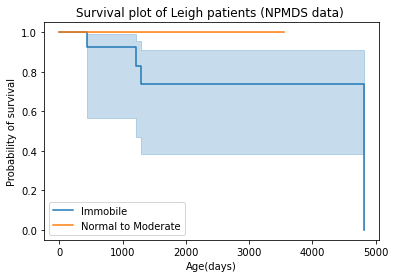

In [88]:
ax = plt.subplot(111)

mob = (surv_df["Mobility_npmds"] == 3)

T = surv_df["Age"]
E = surv_df["Event"]

kmf.fit(T[mob], event_observed=E[mob], label="Immobile")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~mob], event_observed=E[~mob], label="Normal to Moderate")
kmf.plot_survival_function(ax=ax)

plt.title("Survival plot of Leigh patients (NPMDS data) ");
plt.ylabel("Probability of survival")
plt.xlabel("Age(days)")



In [89]:
from lifelines.statistics import logrank_test

results = logrank_test(T[mob], T[~mob], E[mob], E[~mob], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.38 0.24      2.06

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(surv_df,test_size=0.3, random_state=102)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

In [91]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


In [92]:
cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=0.1)

In [93]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
Development_npmds,0.948181
Vision_npmds_self,0.904263
Ptosis_npmds,0.553916
Encephalopathy_npmds,0.547087
Feeding_npmds,0.477148
Cardiovascular_npmds,0.427222
Vision_npmds,0.321936
Sex,0.286061
Seizures_npmds,0.258610
Mobility_npmds,0.225818


In [94]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

ValueError: All samples are censored

In [95]:
from sksurv.metrics import cumulative_dynamic_auc

years = np.arange(2,24)

cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train, y_test, prediction, years)

plt.plot(years, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("years")
plt.ylabel("time-dependent AUC")
plt.grid(True)

ValueError: all samples are censored

In [96]:
npmds_2=npmds.fillna(9)
npmds_2.rename(columns = {'Unique ID': 'UniqueID'},inplace=True)
# Merging both datasets together
npmds_combined =  pd.merge(npmds_2,all[['UniqueID','Birth_date','Sex']], on=["UniqueID"],how='left')



In [97]:
surv_df = npmds_combined
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]]
surv_df['Age'] = surv_df.apply(lambda x: x['Date']-x['Birth_date'], axis = 1)
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)

surv_df['Event'] =  surv_df.apply(lambda x: 1 \
                               if x['Feeding_npmds']== 3 \
                               else 0, axis = 1)

surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID","Event"], keep="first")
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

surv_df.drop(columns=['UniqueID','Birth_date','Date','Feeding_npmds'],inplace=True)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])


In [98]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state=42

df_train, df_test = train_test_split(surv_df,test_size=0.3, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

In [99]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = y_train["Age"]
E = y_train["Event"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 14 total observations, 7 right-censored observations>

Text(0.5, 0, 'Age (days)')

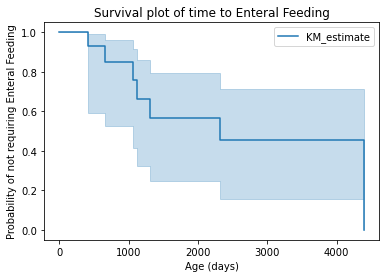

In [100]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))

kmf.plot_survival_function()
plt.title("Survival plot of time to Enteral Feeding");
plt.ylabel("Probability of not requiring Enteral Feeding")
plt.xlabel("Age (days)")

In [101]:
kmf.median_survival_time_

2309.0

In [102]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)


In [103]:
cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=0.1)

In [104]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,3.865887
Development_npmds,1.039425
Vision_npmds,0.820447
Mobility_npmds,0.753882
Sex,0.730046
Cardiovascular_npmds,0.521952
Respiratory_npmds,0.494222
Growth_npmds,0.360489
Ptosis_npmds,0.279570
Encephalopathy_npmds,0.230627


In [105]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])

concordance index: 0.6666666666666666


In [106]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [107]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis()),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

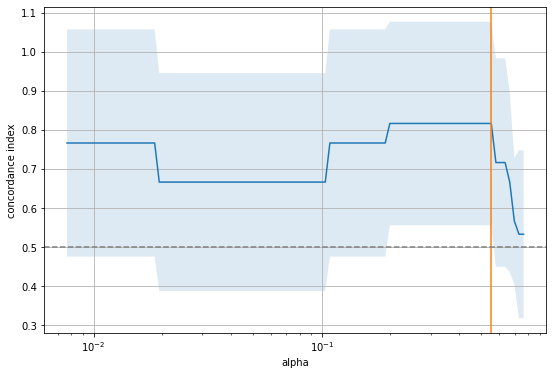

In [108]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 3


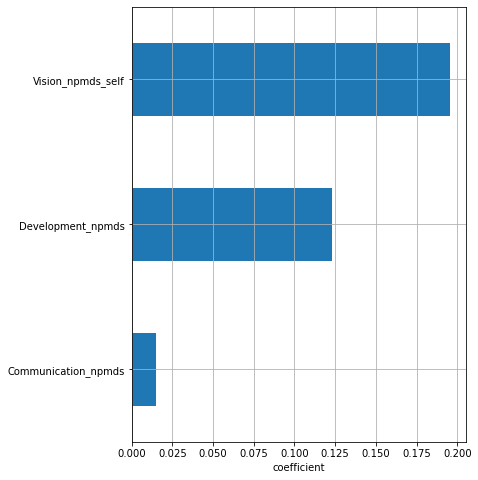

In [109]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)


In [110]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)


,coefficient
Vision_npmds_self,0.195708
Development_npmds,0.122888
Communication_npmds,0.014721


In [111]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 


concordance index: 1.0


In [112]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=7,
                           min_samples_leaf=10,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=10,
                     min_samples_split=7, n_estimators=50, n_jobs=-1,
                     random_state=42, verbose=1)

In [113]:
rsf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


0.5

In [114]:
surv_df = npmds_combined
surv_df = surv_df[surv_df["Date"] > surv_df["Birth_date"]]
surv_df['Age'] = surv_df.apply(lambda x: x['Date']-x['Birth_date'], axis = 1)
surv_df['Age'] = surv_df['Age'].astype('timedelta64[D]').astype(int)

surv_df['Event'] =  surv_df.apply(lambda x: 1 \
                               if x['Mobility_npmds']== 3 \
                               else 0, axis = 1)

surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID","Event"], keep="first")
surv_df = surv_df.sort_values(by="Date").drop_duplicates(subset=["UniqueID"], keep="last")

surv_df.drop(columns=['UniqueID','Birth_date','Date','Mobility_npmds'],inplace=True)

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
surv_df['Sex'] = labelencoder.fit_transform(surv_df['Sex'])

In [115]:
import numpy as np
from sklearn.model_selection import train_test_split

random_state=42

df_train, df_test = train_test_split(surv_df,test_size=0.3, random_state=random_state)

X_train = df_train.drop(columns = ['Event','Age'])
y_train = df_train[['Event','Age']]
X_test = df_test.drop(columns = ['Event','Age'])
y_test = df_test[['Event','Age']]

In [116]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = y_train["Age"]
E = y_train["Event"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 14 total observations, 5 right-censored observations>

Text(0.5, 0, 'Age (days)')

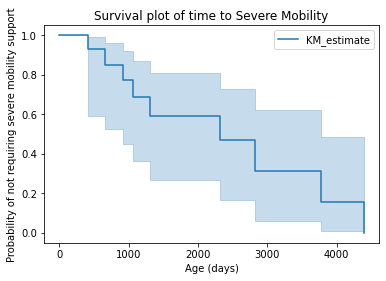

In [117]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
kmf.plot_survival_function()
plt.title("Survival plot of time to Severe Mobility");
plt.ylabel("Probability of not requiring severe mobility support")
plt.xlabel("Age (days)")

In [118]:
kmf.median_survival_time_


2309.0

In [119]:
# Formatting y dataframe into tuple array 
y_train['Event'] = y_train['Event'].replace([1],True)
y_train['Event'] = y_train['Event'].replace([0],False)
y_train = y_train.to_records(index=False)

In [121]:
cph = CoxPHSurvivalAnalysis(alpha=0.1)
cph.fit(X_train, y_train)

CoxPHSurvivalAnalysis(alpha=0.1)

In [122]:
coef= cph.coef_
coefficients = pd.DataFrame(coef,columns=['coefficient'],index=X_train.columns)
coefficients.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,4.678378
Cardiovascular_npmds,1.255317
Feeding_npmds,1.072416
Sex,0.765546
Vision_npmds,0.562517
Encephalopathy_npmds,0.549542
Extrapyramidal_npmds,0.269380
Myopathy_npmds,0.124306
Growth_npmds,0.054578
Development_npmds,-0.037356


In [123]:
from sksurv.metrics import concordance_index_censored

y_test['Event'] = y_test['Event'].replace([1],True)
y_test['Event'] = y_test['Event'].replace([0],False)
y_test = y_test.to_records(index=False)

prediction = cph.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print ('concordance index:', result[0])


concordance index: 0.45454545454545453


In [124]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis()
)
warnings.simplefilter("ignore", ConvergenceWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis', CoxnetSurvivalAnalysis())])

In [125]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis()),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=4).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

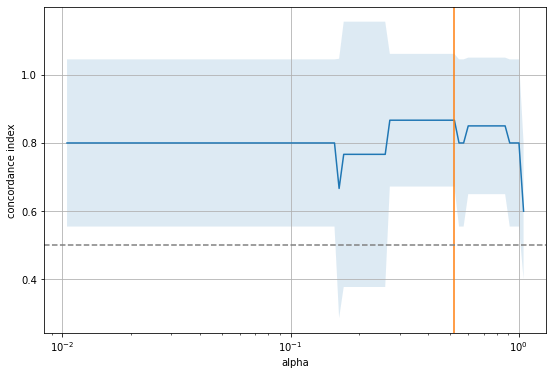

In [126]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 1


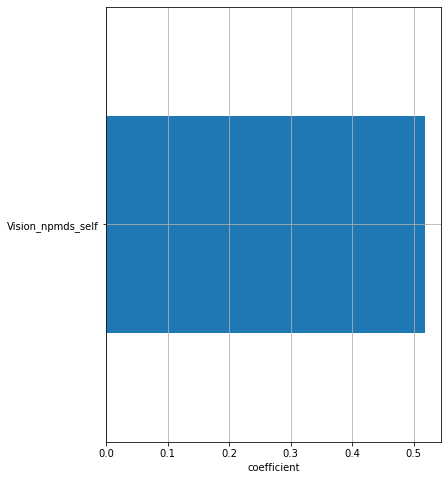

In [127]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=X_train.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [128]:
non_zero_coefs.sort_values(by='coefficient',ascending=False)

,coefficient
Vision_npmds_self,0.517772


In [129]:
prediction =  gcv.best_estimator_.predict(X_test)
result = concordance_index_censored(y_test["Event"], y_test["Age"], prediction)
print("concordance index:", result[0]) 

concordance index: 0.45454545454545453


In [130]:
from sksurv.ensemble import RandomSurvivalForest



rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=7,
                           min_samples_leaf=10,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state,
                           verbose=1)

rsf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomSurvivalForest(max_features='sqrt', min_samples_leaf=10,
                     min_samples_split=7, n_estimators=50, n_jobs=-1,
                     random_state=42, verbose=1)

In [131]:
rsf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


0.5

### Weight by Age Percentiles 

In [103]:
# subsetting the dataframe to understand changes in weight 
w = df_combined[['UniqueID','Sex','Date','Birth_date','Weight_kg']]

In [104]:
import warnings
warnings.filterwarnings('ignore')

# calculating the Age of patient in days for the date when the Weight was recorded 
w['Age_days'] = w['Date'] - w['Birth_date']
w.dropna(axis=0, how='any',inplace=True)
below5= w[w["Age_days"] < "1857 days"] # WHO data contains information for upto 5 years (1856 days)
below5.rename(columns={"Weight_kg":"Weight"}, inplace=True)



In [105]:
# Load dataframes obtained from WHO 
# perc_boys = pd.read_csv(os.path.join(path,"perc_boys.txt"),delimiter='\s+')
# perc_girls = pd.read_csv(os.path.join(path,"perc_girls.txt"),delimiter='\s+')

perc_boys = pd.read_csv("WHO_data/perc_boys.txt",delimiter='\s+')
perc_girls = pd.read_csv("WHO_data/perc_girls.txt",delimiter='\s+')

# Drop L,M,S columns 
perc_boys.drop(columns = ['L','M','S'],inplace=True)
perc_girls.drop(columns = ['L','M','S'],inplace=True)

# Add Sex column to each dataframe 
perc_boys['Sex'] = 'M'
perc_girls['Sex'] = 'F'

# Concatenate the boys and girls dataset
perc_below5 =  pd.concat([perc_boys,perc_girls],ignore_index=True)
perc_below5.rename(columns={"Age":"Age_days"}, inplace=True) # rename Age column
perc_below5['Age_days'] = pd.to_timedelta(perc_below5['Age_days'], unit='D') #converting to timedelta format



In [106]:
# Dataframe for children below 5 years with information on Age and percentiles
below5 = pd.merge(below5, perc_below5, on=["Age_days","Sex"],how='left')


In [107]:
below5.dropna(axis=0,inplace=True)

In [108]:
from scipy.interpolate import interp1d

# formula to interpolate from the percentile rows 
# given the weight of patient to estimate the percentile they are in 
def w_perc (row):
    xg = np.array([row.P01,row.P1,row.P3,row.P5,row.P10,row.P15,
                   row.P25,row.P50,row.P75,row.P85,row.P90,row.P95,row.P97,row.P99,row.P999])
    yg = np.array([0.01,1,3,5,10,15,25,50,75,85,90,95,97,99,99.9])
    f_interp = interp1d(xg,yg,fill_value="extrapolate")
    xw = row.Weight
    
    return(f_interp(xw))


In [109]:
# adding percentiles column 
below5['wba_percentiles'] = below5.apply(lambda row: w_perc(row),axis=1)
below5.drop(columns = ['P01','P1','P3','P5','P10','P15','P25','P50',
                       'P75','P85','P90','P95','P97','P99','P999'],inplace=True)


In [110]:
below5['wba_percentiles'] = below5['wba_percentiles'].astype(int)

In [111]:
below5= below5[below5["wba_percentiles"] < 100] 

<AxesSubplot:xlabel='Age_years', ylabel='wba_percentiles'>

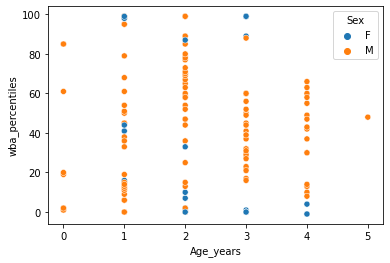

In [114]:
import seaborn as sns

below5['Age_years'] = below5['Age_days'].astype('timedelta64[Y]').astype(int)

sns.scatterplot(data=below5, x='Age_years', y='wba_percentiles', hue='Sex')


<AxesSubplot:xlabel='Age_days', ylabel='wba_percentiles'>

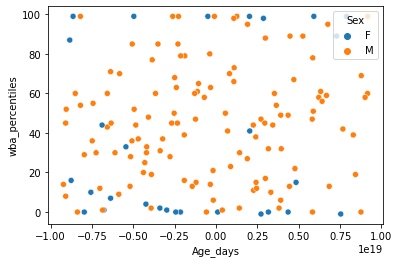

In [118]:

below5['Age_days'] = below5['Age_days'].astype('timedelta64[D]').astype(int)

sns.scatterplot(data=below5, x='Age_days', y='wba_percentiles', hue='Sex')
